In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 


In [3]:
df = pd.read_csv("economic_data_45rows.csv")
df.head()

,Year,Month,Interest_Rate,Unemployment_Rate,Index_Price
0,2018,4,5.22,5.32,2371.66
1,2018,6,5.30,5.35,3189.23
2,2018,10,8.83,5.75,3338.04
3,2019,2,7.27,6.59,3495.86
4,2019,7,6.24,8.32,3201.76


In [6]:
df.drop(columns = ["Year","Month"] , axis= 1 , inplace = True)

In [7]:
df

,Interest_Rate,Unemployment_Rate,Index_Price
0,5.22,5.32,2371.66
1,5.30,5.35,3189.23
2,8.83,5.75,3338.04
3,7.27,6.59,3495.86
4,6.24,8.32,3201.76
5,7.00,7.88,3851.31
6,4.54,6.03,2071.38
7,8.49,9.18,2314.90
8,4.66,9.56,2981.74
9,6.42,7.80,3941.54


In [8]:
df.isnull().sum()

Interest_Rate        0
Unemployment_Rate    0
Index_Price          0
dtype: int64

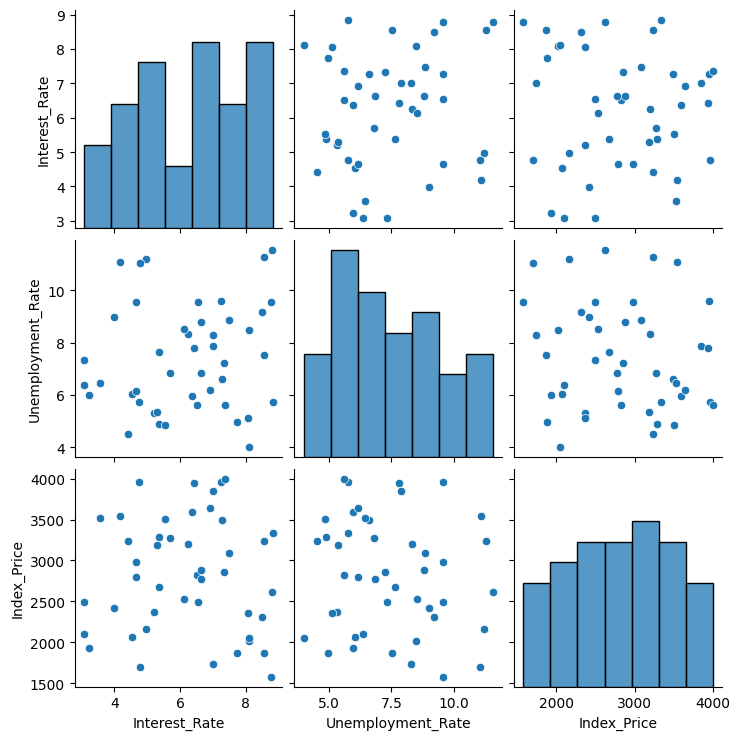

In [9]:
import seaborn as sns
sns.pairplot(df)

In [10]:
df.corr()

,Interest_Rate,Unemployment_Rate,Index_Price
Interest_Rate,1.000000,0.133602,-0.036945
Unemployment_Rate,0.133602,1.000000,-0.145338
Index_Price,-0.036945,-0.145338,1.000000


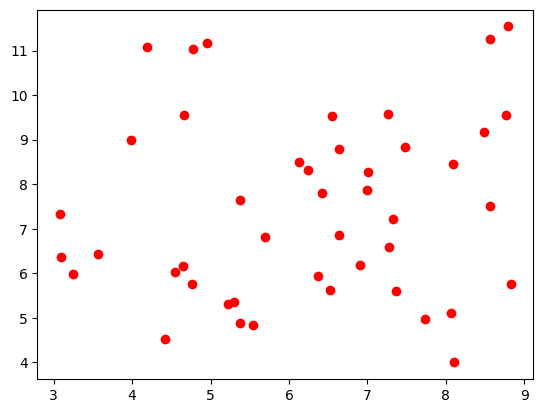

In [25]:
plt.scatter(df['Interest_Rate'],df['Unemployment_Rate'],color = 'r')
plt.xlabel = 'interest_rate'
plt.ylabel = 'unemployment_rate'

In [26]:
x =df.iloc[:,:-1]
y = df.iloc[:,-1]

In [27]:
x.head()

,Interest_Rate,Unemployment_Rate
0,5.22,5.32
1,5.30,5.35
2,8.83,5.75
3,7.27,6.59
4,6.24,8.32


In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 , random_state =  42)

<Axes: xlabel='Interest_Rate', ylabel='Unemployment_Rate'>

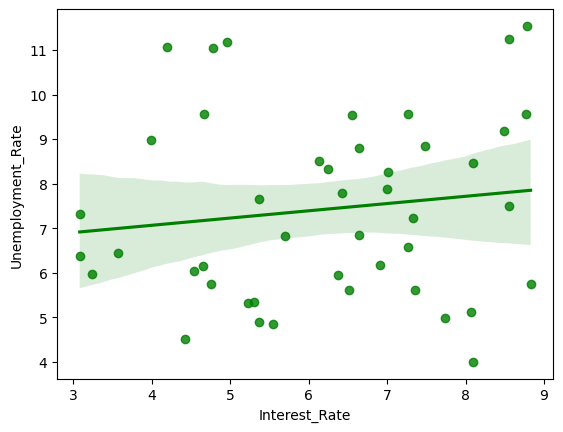

In [41]:
sns.regplot(x='Interest_Rate', y='Unemployment_Rate', data=df, color='green', marker='o')


In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [44]:
from sklearn.linear_model import LinearRegression
regression =  LinearRegression()

In [45]:
regression.fit(x_train,y_train)

LinearRegression()

In [51]:
from sklearn.model_selection import cross_val_score

validation_score = cross_val_score(regression,x_train,y_train,scoring = 'neg_mean_squared_error',cv = 3)

In [53]:
np.mean(validation_score)

-511442.7915426805

In [54]:
y_pred=regression.predict(x_test)

In [55]:
y_pred

array([2637.97624195, 3215.5556132 , 2606.42205167, 2903.70122767,
       2637.90489005, 3294.41374606, 2900.45245641, 3030.85092293,
       2735.13035006])

In [56]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [57]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

497848.5268233502
599.0275315249387
705.5838198423701


In [58]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print(score)

-0.5926437219386214


In [59]:
1 - (1-score)*(len(y_test)-1)/(len(y_test) -x_test.shape[1]-1)

-1.1235249625848285

## Assumptions


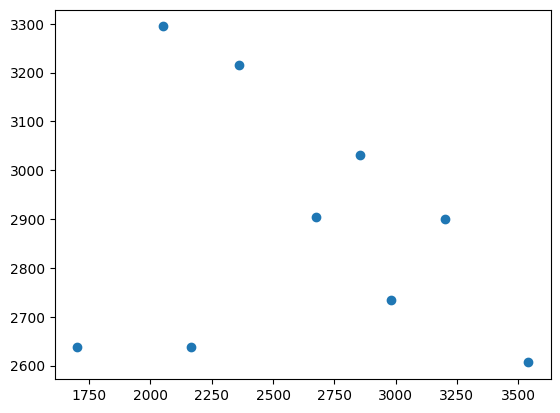

In [60]:
plt.scatter(y_test,y_pred)

In [61]:
residuals = y_test - y_pred
print(residuals)

39    -935.846242
25    -852.875613
26     934.657948
43    -227.951228
35    -470.954890
41   -1243.813746
4      301.307544
12    -177.230923
8      246.609650
Name: Index_Price, dtype: float64


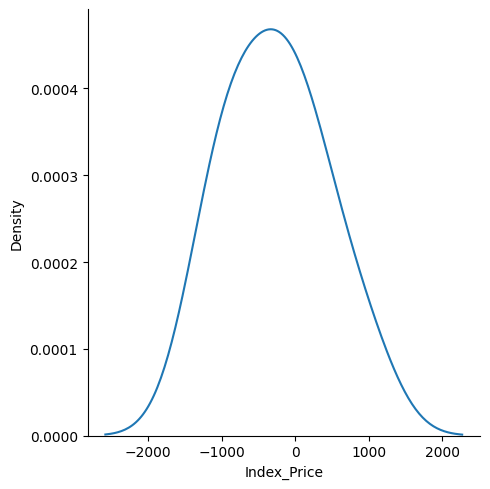

In [62]:
sns.displot(residuals , kind = 'kde')

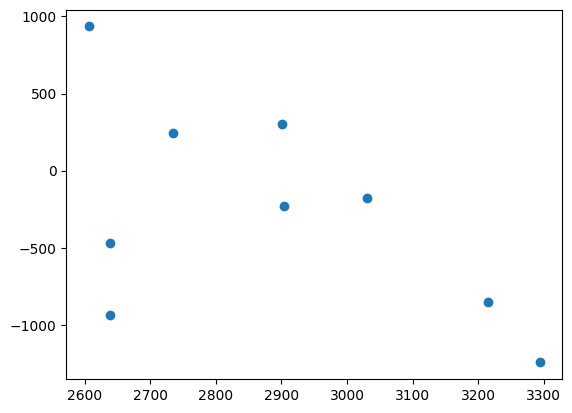

In [63]:
plt.scatter(y_pred,residuals)

In [67]:
import statsmodels.api as sm


ModuleNotFoundError: No module named 'statsmodels'

In [68]:
!pip install statsmodels


   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.6 MB 3.0 MB/s eta 0:00:03
   ----- ---------------------------------- 1.3/9.6 MB 3.0 MB/s eta 0:00:03
   ------- -------------------------------- 1.8/9.6 MB 2.6 MB/s eta 0:00:03
   ------------ --------------------------- 2.9/9.6 MB 3.2 MB/s eta 0:00:03
   ---------------- ----------------------- 3.9/9.6 MB 3.5 MB/s eta 0:00:02
   ------------------ --------------------- 4.5/9.6 MB 3.4 MB/s eta 0:00:02
   ---------------------- ----------------- 5.5/9.6 MB 3.6 MB/s eta 0:00:02
   -------------------------- ------------- 6.3/9.6 MB 3.6 MB/s eta 0:00:01
   ----------------------------- ---------- 7.1/9.6 MB 3.6 MB/s eta 0:00:01
   -------------------------------- ------- 7.9/9.6 MB 3.6 MB/s eta 0:00:01
   ------------------------------------ --- 8.7/9.6 MB 3.7 MB/s eta 0:00:01
   -----------------------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [70]:
import statsmodels.api as sm
model = sm.OLS(y_train,x_train).fit()

In [72]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            Index_Price   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):             -0.056
Method:                 Least Squares   F-statistic:                            0.04486
Date:                Sun, 02 Nov 2025   Prob (F-statistic):                       0.956
Time:                        11:59:01   Log-Likelihood:                         -338.90
No. Observations:                  36   AIC:                                      681.8
Df Residuals:                      34   BIC:                                      685.0
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [74]:
print(regression.coef_)

[  71.69374254 -172.62601418]


In [ ]:
()